Chuyển đến thư mục chứa Dataset

In [2]:
import os

# Đường dẫn chứa Dataset
path = "/content/drive/MyDrive/VTCA /Project AI/CV/Object Classification"
os.chdir(path)

Kiểm tra số lượng các thư mục con có trong dataset

In [4]:
os.listdir()

['Transfer Learning.png',
 '.ipynb_checkpoints',
 'VGG16 03.png',
 'VGG16.png',
 'Resnet 03.png',
 'Resnet.png',
 'VGG16 02.png',
 'Resnet 02.png',
 'Object Dataset 2.rar',
 'Object Dataset 1.rar',
 'Object_Classification_2.h5',
 'sketch_test1.jpg',
 'rafa_nadal_test.jpg']

Cài đặt thư viện giải nén file

In [5]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 6.1 MB/s 


Giải nén file

In [6]:
import patoolib
patoolib.extract_archive("Object Dataset 1.rar")
patoolib.extract_archive("Object Dataset 2.rar")

patool: Extracting Object Dataset 1.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/.shortcut-targets-by-id/1EYCvhmh-4RIvngi-P1sIPLeYnJAg_Abz/AI Specialist Support 04 (Vision)/Object Dataset 1.rar"
patool:     with cwd='./Unpack_lkvgyoe3'
patool: ... Object Dataset 1.rar extracted to `Object Dataset 1'.
patool: Extracting Object Dataset 2.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/.shortcut-targets-by-id/1EYCvhmh-4RIvngi-P1sIPLeYnJAg_Abz/AI Specialist Support 04 (Vision)/Object Dataset 2.rar"
patool:     with cwd='./Unpack_uy2bmh8o'
patool: ... Object Dataset 2.rar extracted to `Object Dataset 2'.


'Object Dataset 2'

Kiếm tra số lượng các thư mục con sau khi giải nén

In [7]:
os.listdir()

['Transfer Learning.png',
 '.ipynb_checkpoints',
 'VGG16 03.png',
 'VGG16.png',
 'Resnet 03.png',
 'Resnet.png',
 'VGG16 02.png',
 'Resnet 02.png',
 'Object Dataset 2.rar',
 'Object Dataset 1.rar',
 'Object_Classification_2.h5',
 'sketch_test1.jpg',
 'rafa_nadal_test.jpg',
 'Object Dataset 1',
 'Object Dataset 2']

Thư viện hiển thị ảnh

In [8]:
from IPython.display import display, Image

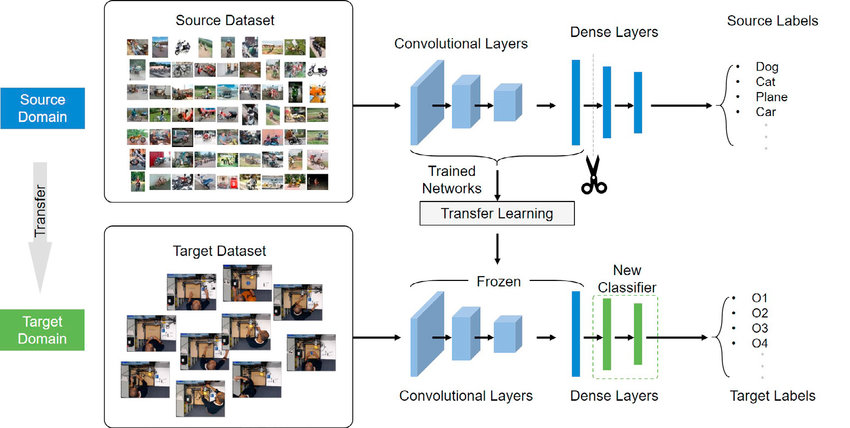

In [ ]:
Image("Transfer Learning.png")

Truy tất cả các thư mục con. </br>
Object Dataset 1 có 2 tập được chia sẵn:
+ Train: gồm 4 class: cats, dogs, horses, humans 
+ Valid: cats, dogs, horses, humans 

In [9]:
root = "Object Dataset 1"
categories = [x[0] for x in os.walk(root) if x[0][1:]]
display(categories)

['Object Dataset 1',
 'Object Dataset 1/train',
 'Object Dataset 1/train/cats',
 'Object Dataset 1/train/dogs',
 'Object Dataset 1/train/horses',
 'Object Dataset 1/train/humans',
 'Object Dataset 1/validation',
 'Object Dataset 1/validation/cats',
 'Object Dataset 1/validation/dogs',
 'Object Dataset 1/validation/horses',
 'Object Dataset 1/validation/humans']

In [12]:
for x in os.walk(root):
  print(x)

('Object Dataset 1', ['train', 'validation'], [])
('Object Dataset 1/train', ['cats', 'dogs', 'horses', 'humans'], [])
('Object Dataset 1/train/cats', [], ['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg

Cài đặt các thư viện

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras.models import load_model, model_from_json
import tensorflow as tf
import PIL

In [15]:
# Mỗi batch sẽ có 32 bức ảnh
batch_size = 32

# Bất lợi của thuật toán Classification là phải fix kích thước ảnh đầu vào
img_height = 224
img_width = 224

In [19]:
# Dataset đã chia train set và validation set sẵn

root = 'Object Dataset 1/'
train_datagen = ImageDataGenerator(
    # mức kéo giãn bức ảnh
    shear_range=10,
    zoom_range=0.2,
    # lật ngang
    horizontal_flip=True,
    validation_split=0.2,
    # Mỗi mô hình Pre-trained model có mỗi bước preprocessing khác nhau.
    # sử dụng Transfer Learning nào thì sẽ sử dụng bước preprocessing của Transfer Learning đó.
    preprocessing_function=preprocess_input)

train_dataset = train_datagen.flow_from_directory(
    directory = root + "/train",
    batch_size = batch_size,
    # shuffle: hoán vị data 1 cách ngẫu nhiên
    shuffle = True,
    target_size = (img_width, img_height),
    # cho ra vector xác suất. Binary cho kết quả đầu ra là 1 con số.
    class_mode = "categorical",
)

# Tập valid không cần cách tham số khác
valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)


valid_dataset = valid_datagen.flow_from_directory(
    directory = root + "/validation",
    batch_size = batch_size,
    # shuffle: hoán vị data 1 cách ngẫu nhiên
    shuffle = True,
    target_size = (img_width, img_height),
    # cho ra vector xác suất. Binary cho kết quả đầu ra là 1 con số.
    class_mode = "categorical",
)

Found 688 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


Object Dataset 2 chưa được chia sẵn tập train và valid. Gồm 3 tập con:
+ airplanes.
+ helicopter.
+ ketch.

In [16]:
root = "Object Dataset 2"
categories = [x[0] for x in os.walk(root) if x[0]]
categories


['Object Dataset 2',
 'Object Dataset 2/airplanes',
 'Object Dataset 2/helicopter',
 'Object Dataset 2/ketch']

In [17]:
# Dataset chưa chia được sẵn train set và validation set

root = 'Object Dataset 2/'
train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(
    validation_split=0.2, 
    preprocessing_function=preprocess_input)

train_generator2 = train_datagen.flow_from_directory(
    directory= root,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    subset="training",
    class_mode='categorical'
    )

valid_generator2 = validation_datagen.flow_from_directory(
    directory= root,
    batch_size=32,
    shuffle=True,
    target_size=(224,224),
    subset="validation",
    class_mode='categorical'
    )

Found 255 images belonging to 3 classes.
Found 62 images belonging to 3 classes.


## ResNet
ResNet (Residual Network) là mạng được đề xuất bởi nhóm tác giả đứng đầu là Kaiming He đến từ Miscrosoft Research, đây là mô hình vô địch ở cuộc thi ILSVRC năm 2015. Đây là mạng CNN cực kỳ sâu với tối đa 152 lớp. Ngoài ra, mô hình này còn thống trị trong các bài toán detection, localization, segmentation của cả hai cuộc thi ILSVRC và COCO Challenge. 
Qua quá trình thực nghiệm, nhóm tác giả nhận thấy rằng với độ sâu ngày càng tăng thì độ chính xác sẽ trở nên bão hòa và giảm dần xuống (degradation problem). Chính vì vậy, ResNet được giới thiệu với tư cách là mạng CNN cực kỳ sâu nhưng vẫn đảm bảo được độ chính xác cao. </br>

Nếu như Inception module là điểm nhấn của mô hình GoogLeNet thì ý tưởng chính của mô hình ResNet là khối Residual block. Cách tiếp cận là thêm skip connection (hay skip connection) cho phép thông tin đầu vào x truyền đi mà không cần đi qua các lớp CNN. Việc thêm lớp bổ sung x (chính là x thông qua skip connection) đảm bảo rằng hiệu suất của mô hình sẽ không giảm, trái lại, F(x) sau khi đi qua hàm ReLU sẽ làm mất đi một phần thông tin Features Map cộng với x (F(x) + x) sẽ giúp làm giàu thông tin đặc trưng hơn, giúp hiệu suất mô hình có thể tăng lên.



In [23]:
# Đọc các thư mục con theo thứ tự

class_dict = train_dataset.class_indices

class_names = list(class_dict.keys())
print(class_names)

['cats', 'dogs', 'horses', 'humans']


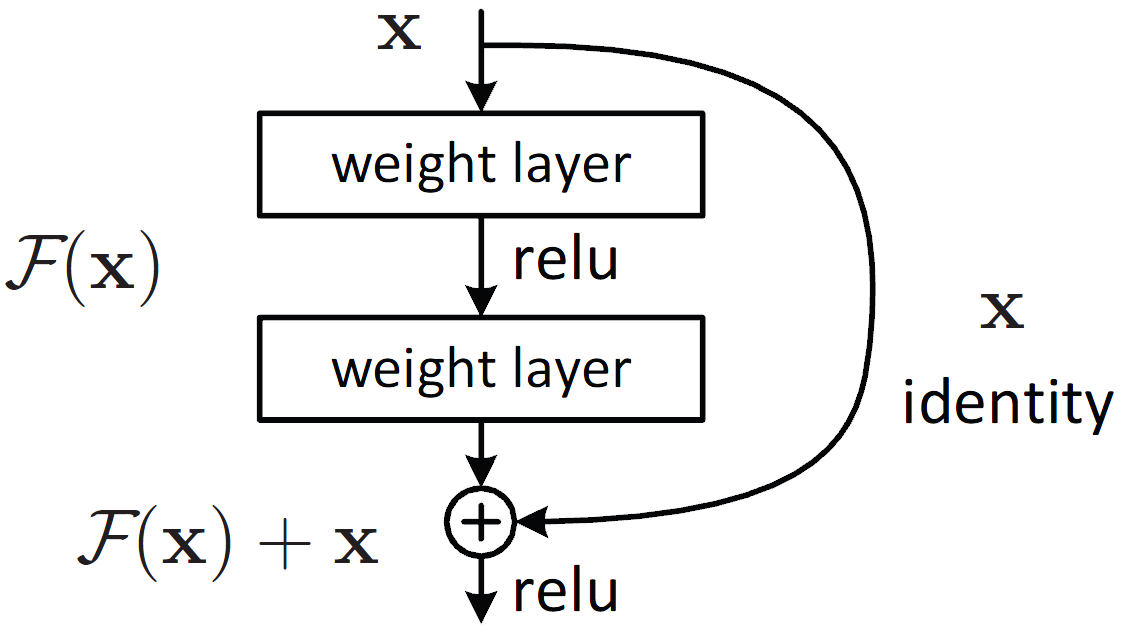

In [25]:
Image("Resnet.png")

In [28]:
conv_base = ResNet50(
    # include_top tức là phần inference của mô hình CNN nói chung
    # và ResNet nói riêng, include_top = False tức là bỏ phần inference ra.
    include_top = False,
    weights = 'imagenet'
)

94781440/94765736 [==============================] - 0s 0us/step


In [29]:
for layer in conv_base.layers:
  # layer.trainable = False: Không train lại các weights trên 50 layers này. 
  # Sử dụng weights đã được train trên ResNet50.
  # layer.trainable = True: nếu muốn train lại thì phải có đủ data.
  layer.trainable = False

In [31]:
# Input
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
# Chọn relu là vì tốc độ performance cao và đặc trưng bức ảnh: không phải 
# hướng đó thì cho = 0, còn bắt trúng hướng đó thì giá trị bằng chính nó.
x = layers.Dense(128, activation = "relu")(x)

# Output
predictions = layers.Dense(len(class_names), activation= "softmax")(x)

model = Model(conv_base.input, predictions)

In [32]:
model.compile(loss = "categorical_crossentropy", 
              optimizer="adam", 
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

Training

In [33]:
history = model.fit(train_dataset,
                    steps_per_epoch = train_dataset.samples // batch_size,
                    epochs = 10,
                    validation_data = valid_dataset,
                    validation_steps = valid_dataset.samples // batch_size)

Epoch 1/10
21/21 [==============================] - 24s 506ms/step - loss: 0.3650 - accuracy: 0.8826 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 2/10
21/21 [==============================] - 10s 484ms/step - loss: 0.0447 - accuracy: 0.9817 - val_loss: 0.0119 - val_accuracy: 0.9896
Epoch 3/10
21/21 [==============================] - 10s 476ms/step - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 4/10
21/21 [==============================] - 10s 459ms/step - loss: 0.0126 - accuracy: 0.9970 - val_loss: 0.0468 - val_accuracy: 0.9896
Epoch 5/10
21/21 [==============================] - 12s 584ms/step - loss: 0.0130 - accuracy: 0.9970 - val_loss: 0.0145 - val_accuracy: 0.9896
Epoch 6/10
21/21 [==============================] - 10s 463ms/step - loss: 0.0111 - accuracy: 0.9970 - val_loss: 0.0484 - val_accuracy: 0.9792
Epoch 7/10
21/21 [==============================] - 10s 460ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0066 - val_accuracy: 1.0000

Lưu weights bằng file .h5

In [34]:
# save
model.save_weights('Object_Classification_1.h5')

Sử dụng file .h5

In [35]:
model.load_weights("Object_Classification_1.h5")

Phân loại bằng một bức ảnh ngẫu nhiên

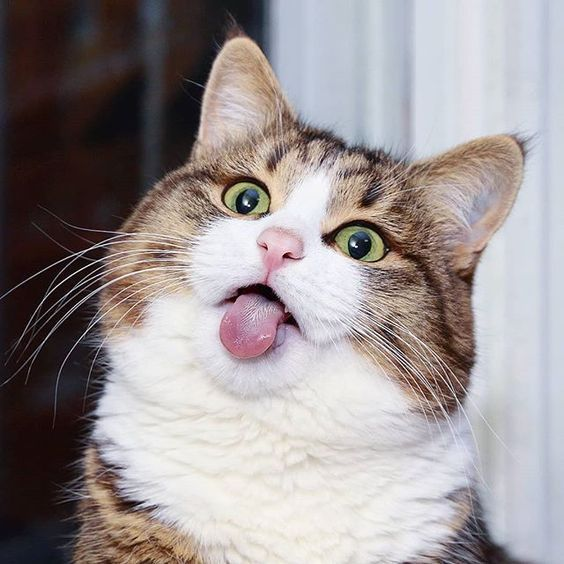

In [47]:
img_path = "cat_test.jpg"
Image(img_path)

In [48]:
from keras.preprocessing import image

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
print(type(img)) # <class 'PIL.Image.Image'>
x = image.img_to_array(img)
print(x.shape) # (224, 224, 3)

# Tại sao phải mở rộng dims trước khi bỏ vào ResNet?
# => 1 batch là 32 ảnh nên batch sẽ có giá trị (32,224,224,3)
# Khi train thì chúng ta train trên từng batch nên cũng phải follow theo giá trị này
# Khi test thì chúng ta cũng test theo giá trị giống vậy nhưng chỉ test 1 ảnh => (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)
print(x.shape) # (1, 224, 224, 3)

<class 'PIL.Image.Image'>
(224, 224, 3)
(1, 224, 224, 3)


In [49]:
img = image.load_img(img_path, target_size=(img_height, img_width))
# Convert PIL.Image.Imageimg to array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Tiền xử lý của ResNet-50, cụ thể là chuẩn hóa pixel 0-255 về 0-1
x = preprocess_input(x)

predictions = model.predict(x)
score = np.round(tf.nn.softmax(predictions[0]), 5)
print(class_names)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

['cats', 'dogs', 'horses', 'humans']
[0.47537 0.17488 0.17488 0.17488]
This image most likely belongs to cats with a 47.54 percent confidence.


## VGG 
Về nhì trong cuộc thi ImageNet năm 2014 là VGG Net (đặt tên theo đội thi) được công bố bởi nhóm của Karen Simonyan và Andrew Zisserman đến từ Đại học Oxford. Chúng ta nhận thấy rằng các mô hình CNN ngày càng sâu hơn, VGG có thể xem là một phiên bản cải tiến của AlexNet về độ sâu. Kết quả VGG cải thiện hơn so với AlexNet chứng tỏ độ sâu của mạng CNN ảnh hưởng lớn đến độ chính xác.

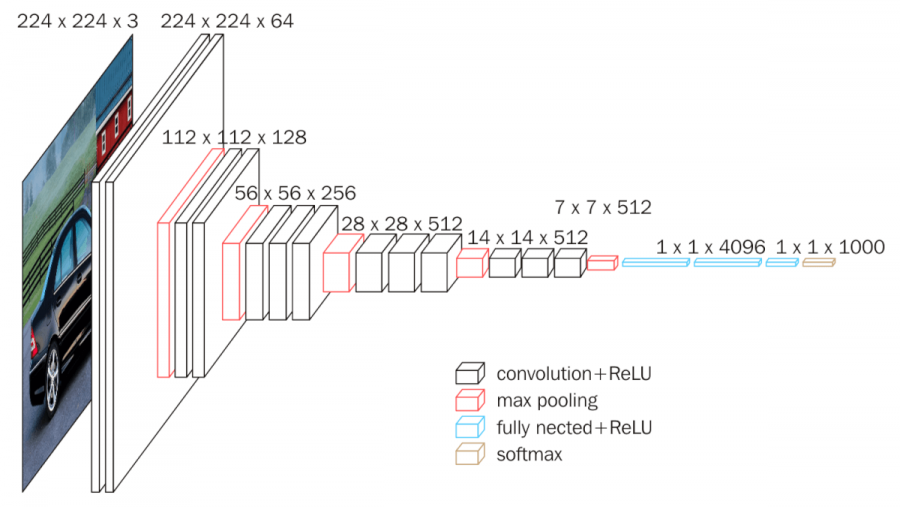

In [50]:
Image("VGG16.png")

In [52]:
from tensorflow.keras.applications import vgg16

conv_base = vgg16.VGG16(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [53]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(3, activation='softmax')(x)
model2 = Model(conv_base.input, predictions)

In [54]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training

In [55]:
history = model2.fit(train_generator2, 
                    steps_per_epoch = train_generator2.samples // batch_size,
                    epochs=10, 
                    validation_data=valid_generator2, 
                    validation_steps = valid_generator2.samples // batch_size)

Epoch 1/10
7/7 [==============================] - 9s 873ms/step - loss: 1.0343 - accuracy: 0.7175 - val_loss: 0.2491 - val_accuracy: 0.9375
Epoch 2/10
7/7 [==============================] - 3s 471ms/step - loss: 0.1154 - accuracy: 0.9641 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 3s 468ms/step - loss: 0.0710 - accuracy: 0.9821 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 3s 471ms/step - loss: 0.0379 - accuracy: 0.9821 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 4s 628ms/step - loss: 0.0395 - accuracy: 0.9821 - val_loss: 6.1279e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 3s 478ms/step - loss: 0.0253 - accuracy: 0.9955 - val_loss: 3.3573e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 3s 474ms/step - loss: 0.0108 - accuracy: 0.9955 - val_loss: 6.9611e-04 - val_accuracy: 1.0000
Epoch 8/

Lưu weights vào file .h5

In [56]:
model2.save_weights("Object_Classification_2.h5")

Load weights từ file .h5

In [57]:
model2.load_weights("Object_Classification_2.h5")

In [58]:
class_dict2 = train_generator2.class_indices
class_names2 = list(class_dict2.keys())
print(class_dict2)
print(class_names2)

{'airplanes': 0, 'helicopter': 1, 'ketch': 2}
['airplanes', 'helicopter', 'ketch']


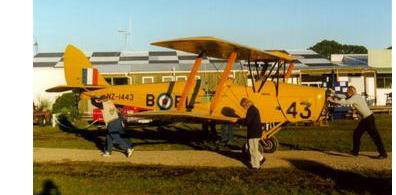

In [59]:
root = 'Object Dataset 2/'
img_path = root + "airplanes/image_0045.jpg"
PIL.Image.open(img_path)

In [60]:
img = image.load_img(img_path, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model2.predict(x)
score = np.round(tf.nn.softmax(predictions[0]), 5)
print(class_names2)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names2[np.argmax(score)], 100 * np.max(score))
)

['airplanes', 'helicopter', 'ketch']
[0.57612 0.21194 0.21194]
This image most likely belongs to airplanes with a 57.61 percent confidence.


In [ ]:
files=valid_generator2.filenames
files[:10]

['airplanes/image_0001.jpg',
 'airplanes/image_0002.jpg',
 'airplanes/image_0003.jpg',
 'airplanes/image_0004.jpg',
 'airplanes/image_0005.jpg',
 'airplanes/image_0006.jpg',
 'airplanes/image_0007.jpg',
 'airplanes/image_0008.jpg',
 'airplanes/image_0009.jpg',
 'airplanes/image_0010.jpg']

This image most likely belongs to airplanes with a 57.61 percent confidence.


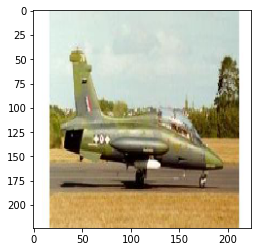

This image most likely belongs to airplanes with a 57.61 percent confidence.


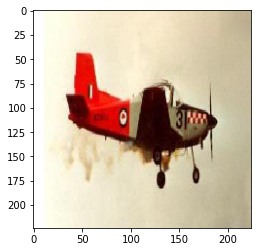

This image most likely belongs to airplanes with a 57.61 percent confidence.


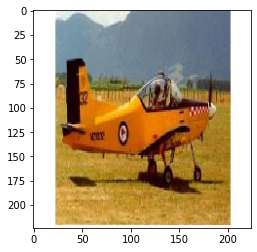

This image most likely belongs to airplanes with a 57.61 percent confidence.


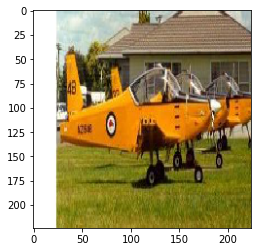

This image most likely belongs to airplanes with a 57.61 percent confidence.


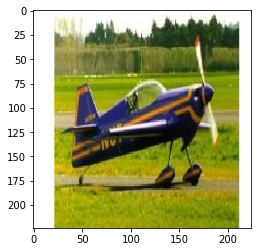

This image most likely belongs to airplanes with a 57.61 percent confidence.


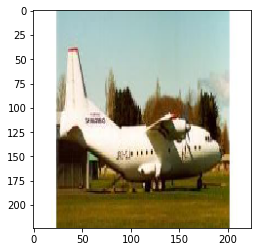

This image most likely belongs to airplanes with a 57.59 percent confidence.


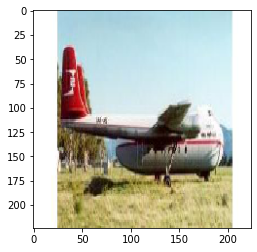

This image most likely belongs to airplanes with a 57.61 percent confidence.


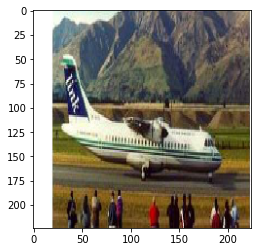

This image most likely belongs to airplanes with a 57.61 percent confidence.


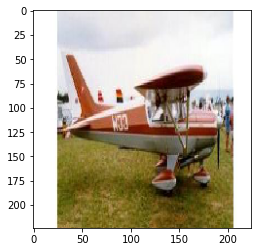

This image most likely belongs to airplanes with a 57.61 percent confidence.


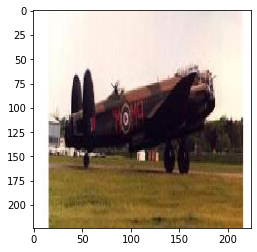

This image most likely belongs to airplanes with a 57.60 percent confidence.


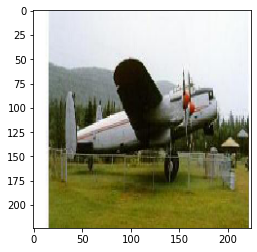

In [61]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

i = 0
for filename in valid_generator2.filenames:
  if("airplanes" in filename):
    img_path = root + filename
    img = image.load_img(img_path, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    predictions = model2.predict(x)
    score = np.round(tf.nn.softmax(predictions[0]), 5)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names2[np.argmax(score)], 100 * np.max(score))
    )
    plt.imshow(img)
    plt.show()
    
    i = i + 1
    if i > 10:
      break

This image most likely belongs to helicopter with a 57.61 percent confidence.


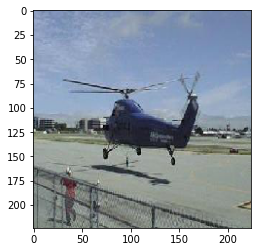

This image most likely belongs to helicopter with a 57.61 percent confidence.


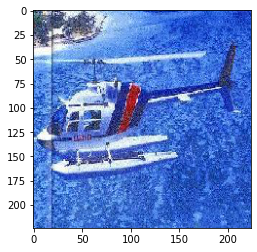

This image most likely belongs to helicopter with a 57.61 percent confidence.


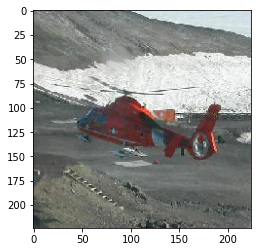

This image most likely belongs to helicopter with a 57.61 percent confidence.


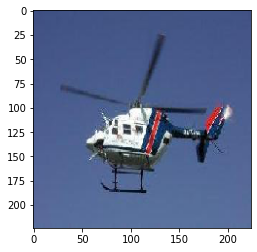

This image most likely belongs to helicopter with a 57.56 percent confidence.


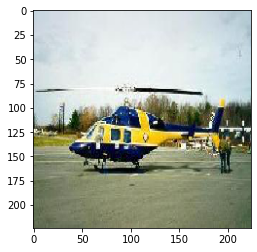

This image most likely belongs to helicopter with a 57.61 percent confidence.


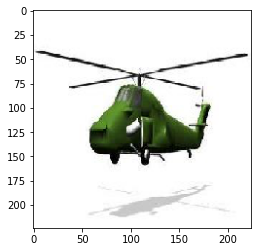

This image most likely belongs to helicopter with a 57.61 percent confidence.


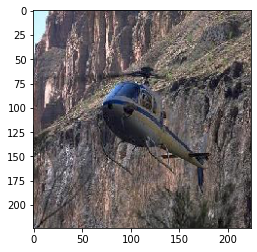

This image most likely belongs to helicopter with a 57.61 percent confidence.


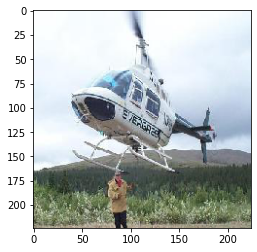

This image most likely belongs to helicopter with a 57.61 percent confidence.


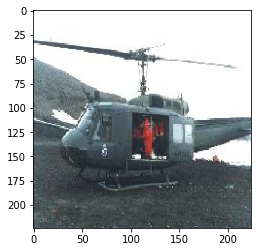

This image most likely belongs to helicopter with a 57.59 percent confidence.


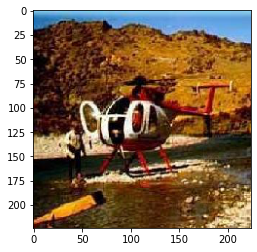

This image most likely belongs to helicopter with a 57.61 percent confidence.


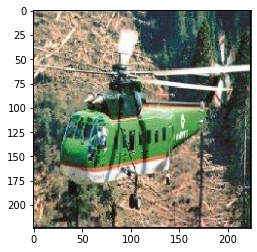

In [62]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

i = 0
for filename in valid_generator2.filenames:
  if("helicopter" in filename):
    img_path = root + filename
    img = image.load_img(img_path, target_size=(img_height, img_width))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    predictions = model2.predict(x)
    score = np.round(tf.nn.softmax(predictions[0]), 5)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names2[np.argmax(score)], 100 * np.max(score))
    )
    plt.imshow(img)
    plt.show()
    
    i = i + 1
    if i > 10:
      break

Phân loại từ một bức ảnh ngẫu nhiên

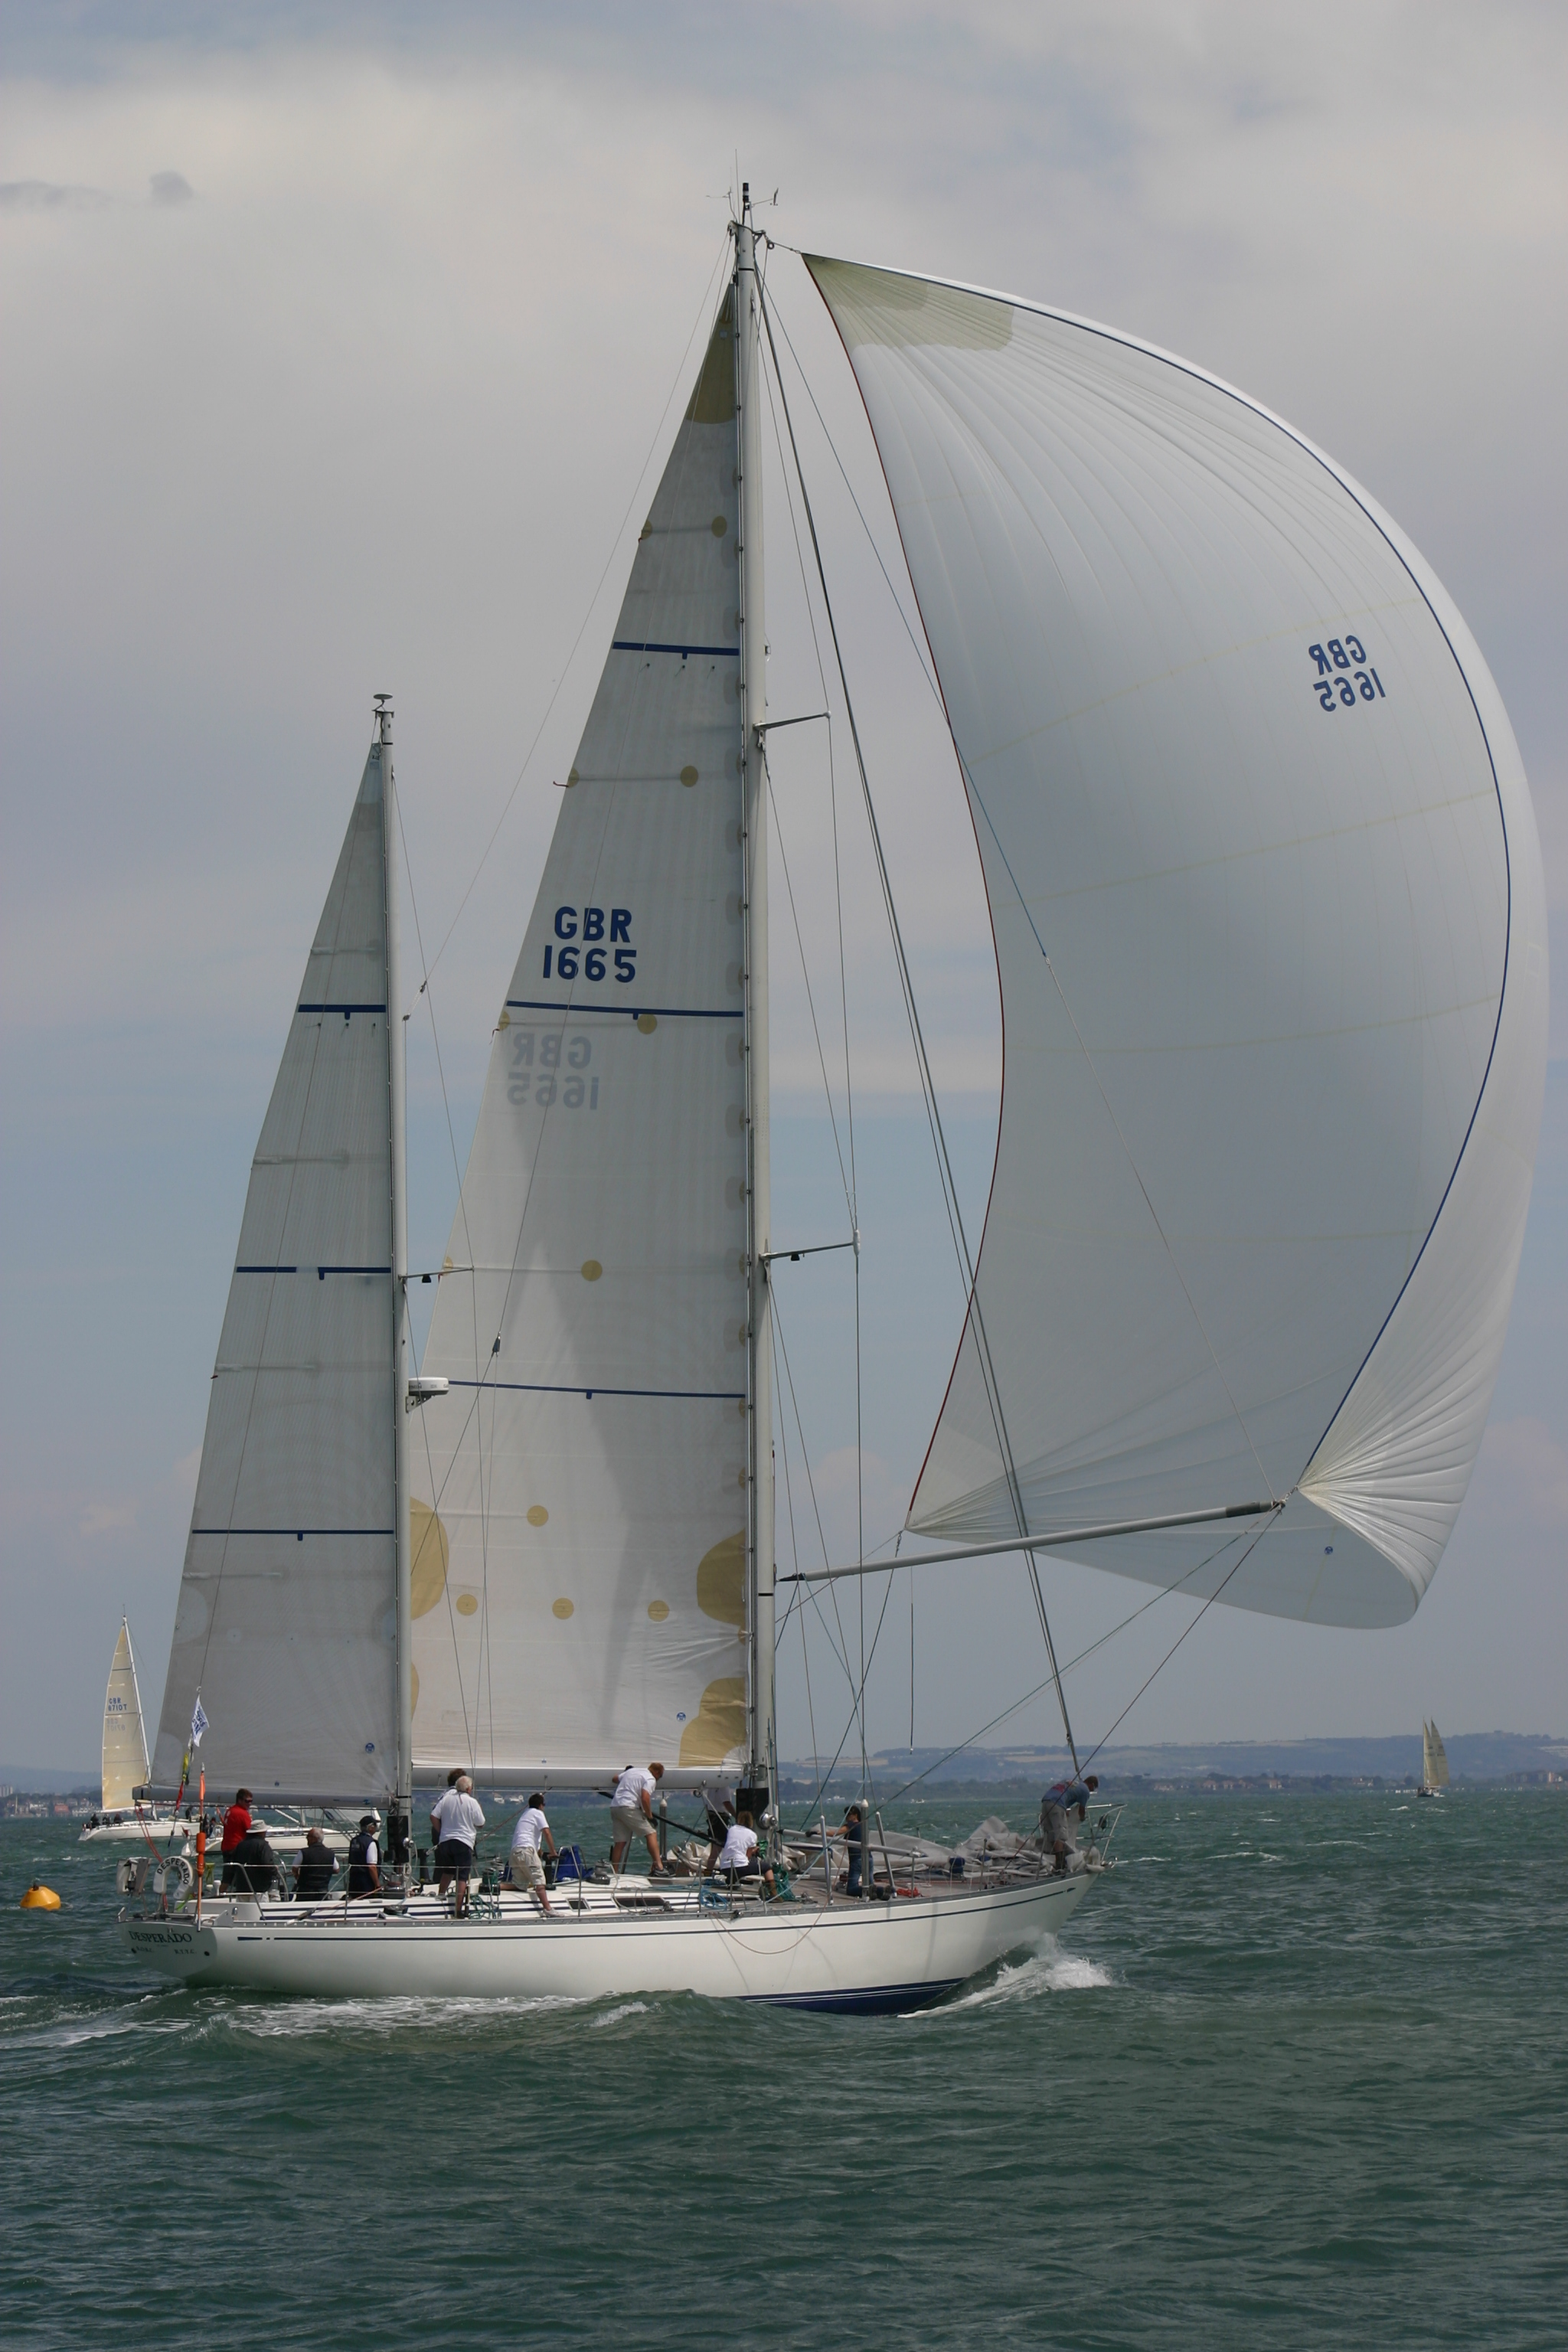

In [63]:
img_path = "sketch_test1.jpg"
Image(img_path)

In [64]:
img = image.load_img(img_path, target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model2.predict(x)
score = np.round(tf.nn.softmax(predictions[0]), 5)
print(class_names2)
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names2[np.argmax(score)], 100 * np.max(score))
)

['airplanes', 'helicopter', 'ketch']
[0.21194 0.21194 0.57612]
This image most likely belongs to ketch with a 57.61 percent confidence.
